In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

au = pd.read_csv('D:/SMU/Data Analytics/Datasets/AmongUs.csv')

au.isnull().sum()

imp_au = au[au['Team']==1]
crew_au = au[au['Team']==0]

#if imposter
x = imp_au.drop(columns = ['Outcome'], axis=1)
y = imp_au['Outcome']

from sklearn.model_selection import train_test_split

#creating the train and validation set
x_train, x_valid, y_train, y_valid = train_test_split(x,y,random_state = 101,stratify=y,test_size=0.25)

#distribution in training set
y_train.value_counts(normalize=True)
y_valid.value_counts(normalize=True)

#shape of training set
x_train.shape, y_train.shape

#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

#create decision tree function
model_imp = DecisionTreeClassifier(random_state=10)

#fitting the model
model_imp.fit(x_train, y_train)

#check training score
model_imp.score(x_train, y_train)

#check validation score
model_imp.score(x_valid, y_valid)

#predictions on validation set
model_imp.predict(x_valid)

model_imp.predict_proba(x_valid)

#run the training and validation sets 10 times starting with max depth of 1 and each time increasing its depth by 1
train_accuracy = []
validation_accuracy = []
for depth in range(1,50):
	model_imp = DecisionTreeClassifier(max_depth=depth, random_state=10)
	model_imp.fit(x_train, y_train)
	train_accuracy.append(model_imp.score(x_train, y_train))
	validation_accuracy.append(model_imp.score(x_valid, y_valid))
    
#create a dataframe to display the max depth results
frame = pd.DataFrame({'max_depth':range(1,50), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head(50)

,max_depth,train_acc,valid_acc
0,1,0.722008,0.643678
1,2,0.722008,0.643678
2,3,0.722008,0.643678
3,4,0.729730,0.655172
4,5,0.733591,0.643678
5,6,0.733591,0.643678
6,7,0.733591,0.643678
7,8,0.733591,0.643678
8,9,0.733591,0.643678
9,10,0.733591,0.643678


In [7]:
#set the maximum depth and leaf nodes of the decision tree model to prevent overfitting
model_imp = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=25, random_state=10)
model_imp.fit(x_train, y_train)
model_imp.score(x_train, y_train)
model_imp.score(x_valid, y_valid)

# define input
new_input = [[input("Team (0: Crewmate, 1: Imposter): "), input("Tasks Completed: "), input("All Tasks Completed?: "), input("Murdered?: "), input("Imposter Kills: "), input("Ejected?: "), input("Sabotages: "), input("Region (1: NA,0: Europe)")]]
# get prediction for new input
new_output = model_imp.predict(new_input)
# summarize input and output
print("Outcome: ", new_output)

Team (0: Crewmate, 1: Imposter): 1
Tasks Completed: 0
All Tasks Completed?: 0
Murdered?: 0
Imposter Kills: 3
Ejected?: 1
Sabotages: 2
Region (1: NA,0: Europe)1
Outcome:  ['Loss']


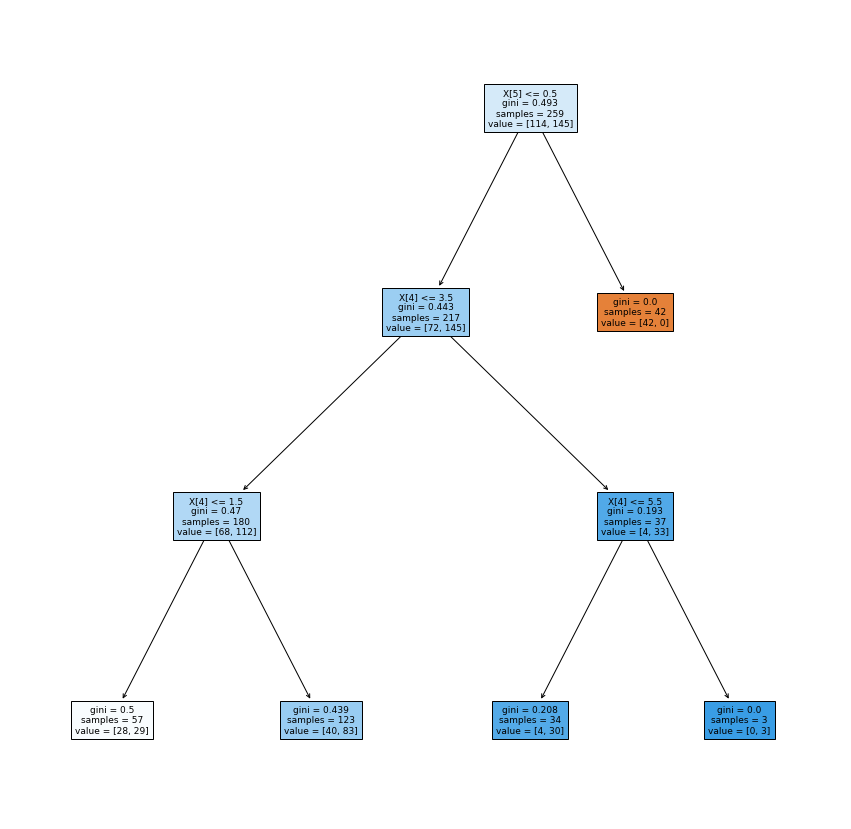

In [9]:
from sklearn import tree

!pip install graphviz

decision_tree = tree.export_graphviz(model_imp,out_file='tree.dot',feature_names=x_train.columns,max_depth=2,filled=True)

from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(15,15))
clf = DecisionTreeClassifier(max_depth = 3).fit(x_train, y_train)
plot_tree(clf, filled=True, fontsize=9)
plt.show()